### Additional figures/analyses for revisions

In [11]:
# remotes::install_github("mahendra-mariadassou/phyloseq-extended", ref = "dev")
library(phyloseq.extended)
library(phyloseq)
library(ggplot2)

In [2]:
# load data from diversity analyses
load("../02-diversity_analyses/.RData")

In [5]:
ps.dat
head(sample_data(ps.dat))

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2918 taxa and 748 samples ]
sample_data() Sample Data:       [ 748 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 2918 taxa by 11 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 2918 tips and 2917 internal nodes ]

,study_id,aliquot_type,sex,age_y,study_group,FDI_code,oral_health,tooth_health,tooth_type,tooth_age
,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
DM00001V1PQ,DM00001,CAE-PE,M,9,HI,NA,CAE,PE,NA,NA
DM00005V1PQ46-2,DM00005,CF-PF,M,6,HUU,46,CF,PF,molar,adult
DM00006V1PQ1,DM00006,CF-PF,M,7,HI,NA,CF,PF,NA,NA
DM00007V1PQ1,DM00007,CF-PF,M,6,HEU,NA,CF,PF,NA,NA
DM00008V1PQ16-2,DM00008,CF-PF,F,9,HI,16,CF,PF,molar,adult
DM00008V1PQ26-1,DM00008,CF-PF,F,9,HI,26,CF,PF,molar,adult


#### Rarefaction curve

rarefying sample DM00001V1PQ
rarefying sample DM00005V1PQ46-2
rarefying sample DM00006V1PQ1
rarefying sample DM00007V1PQ1
rarefying sample DM00008V1PQ16-2
rarefying sample DM00008V1PQ26-1
rarefying sample DM00009V1PQ65
rarefying sample DM00010V1PQ54
rarefying sample DM00011V1PQ55-1
rarefying sample DM00012V1PQ1
rarefying sample DM00013V1PQ65-3
rarefying sample DM00013V1PQ83-2
rarefying sample DM00014V1PQ3
rarefying sample DM00014V1PQ64-2
rarefying sample DM00014V1PQ84-1
rarefying sample DM00015V1PQ
rarefying sample DM00016V1PQ16
rarefying sample DM00016V1PQ26
rarefying sample DM00017V1PQ16
rarefying sample DM00017V1PQ31
rarefying sample DM00018V1PQ46-1
rarefying sample DM00018V1PQ74-1
rarefying sample DM00018V1PQ75-1
rarefying sample DM00019V1PQ16
rarefying sample DM00019V1PQ36-1
rarefying sample DM00020V1PQ16-1
rarefying sample DM00020V1PQ26-1
rarefying sample DM00021V1PQ11-12-1
rarefying sample DM00021V1PQ31-41-1
rarefying sample DM00021V1PQ55-1
rarefying sample DM00021V1PQ65-1
raref

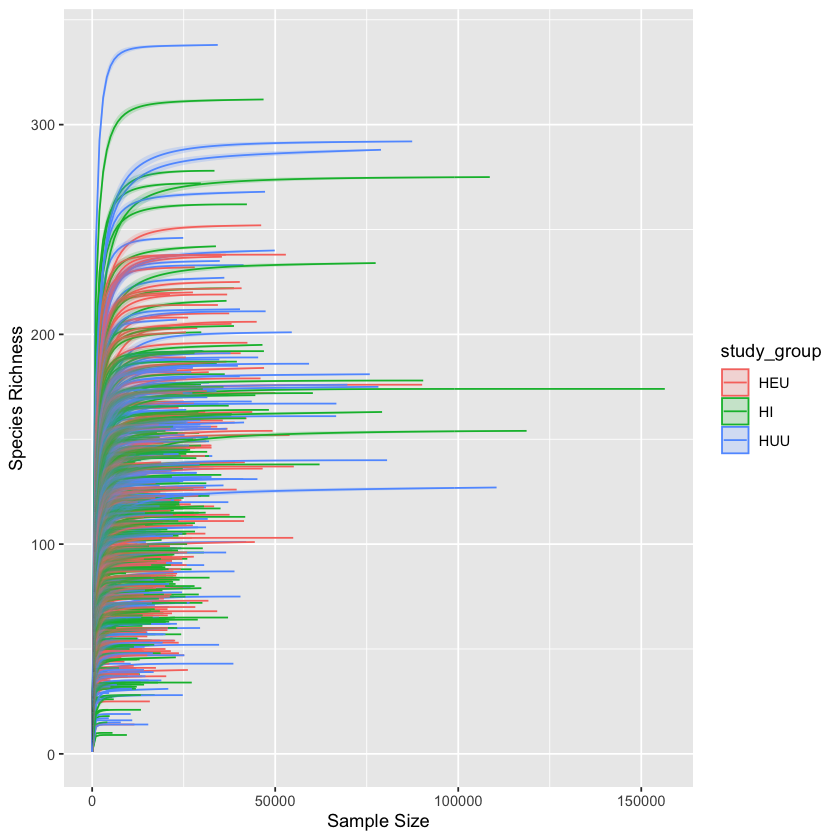

In [24]:
options(warn=-1) # suppress warnings
p <- ggrare(ps.dat, step = 1000, color = "study_group", se = TRUE)
options(warn=0) # back on

pdf 
  2

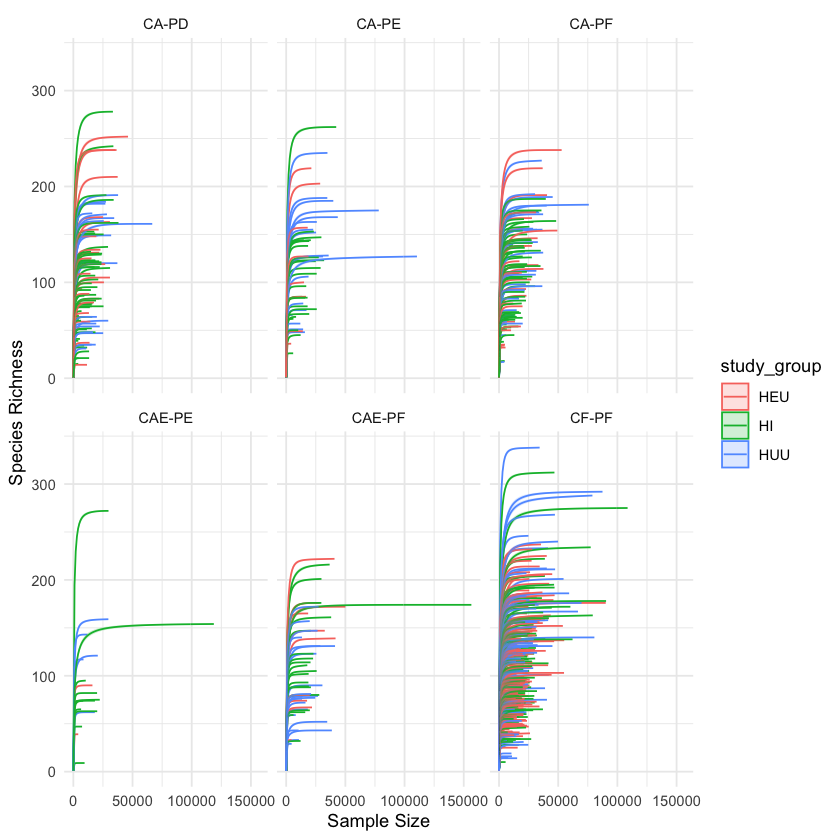

In [26]:
p <- p + facet_wrap(~aliquot_type)
p + theme_minimal()
pdf("rarefaction_plots.pdf")
p + theme_minimal()
dev.off()

#### Alpha diversity plots

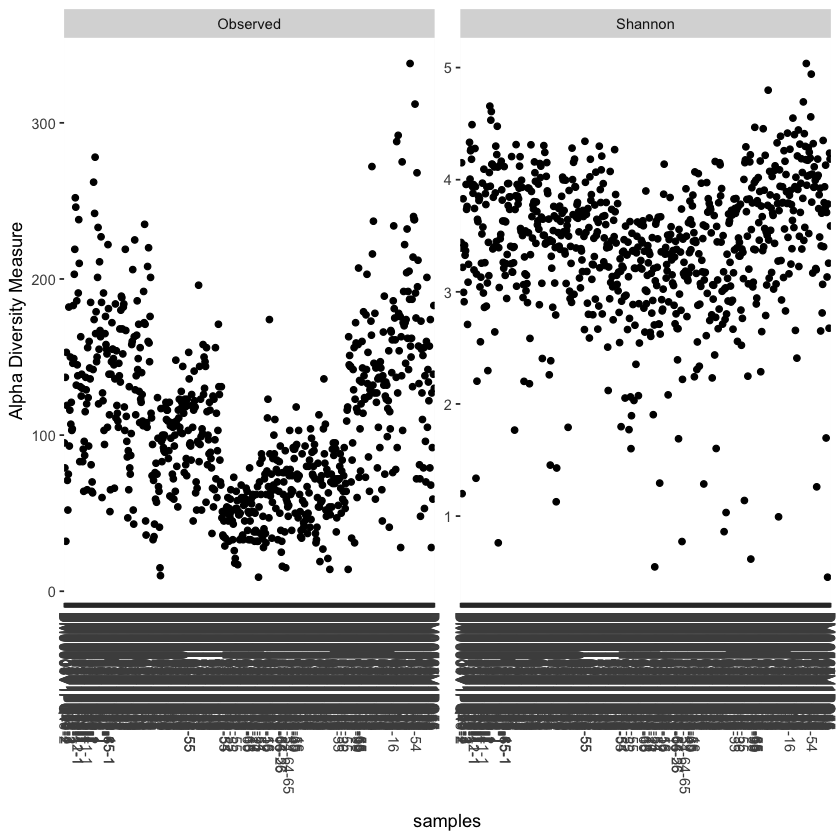

In [28]:
plot_richness(ps.dat, measures=c("Observed", "Shannon"))

pdf 
  2

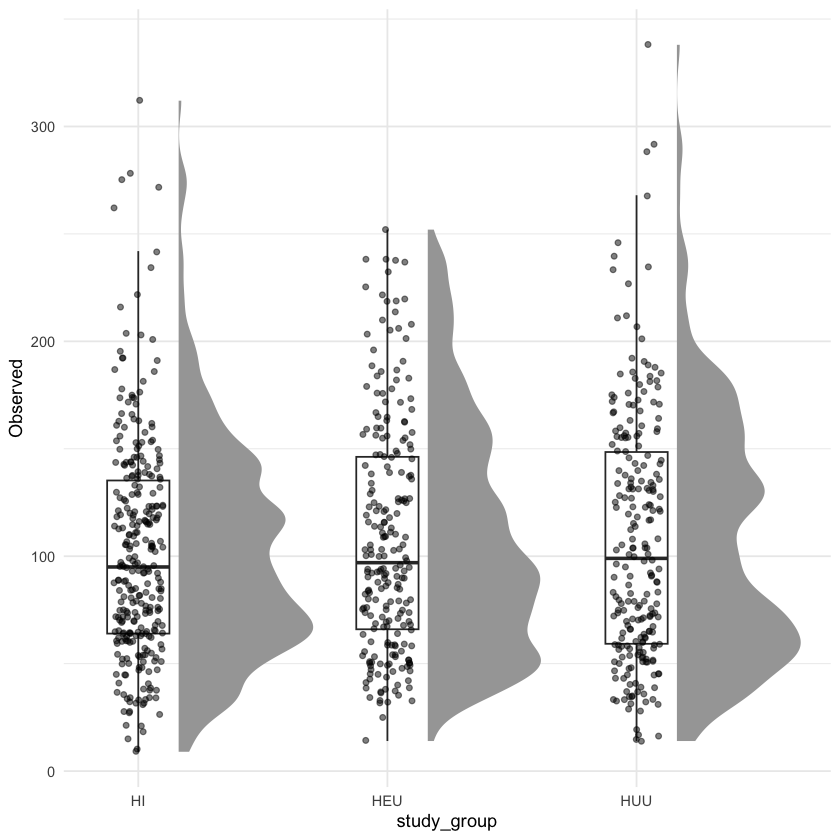

pdf 
  2

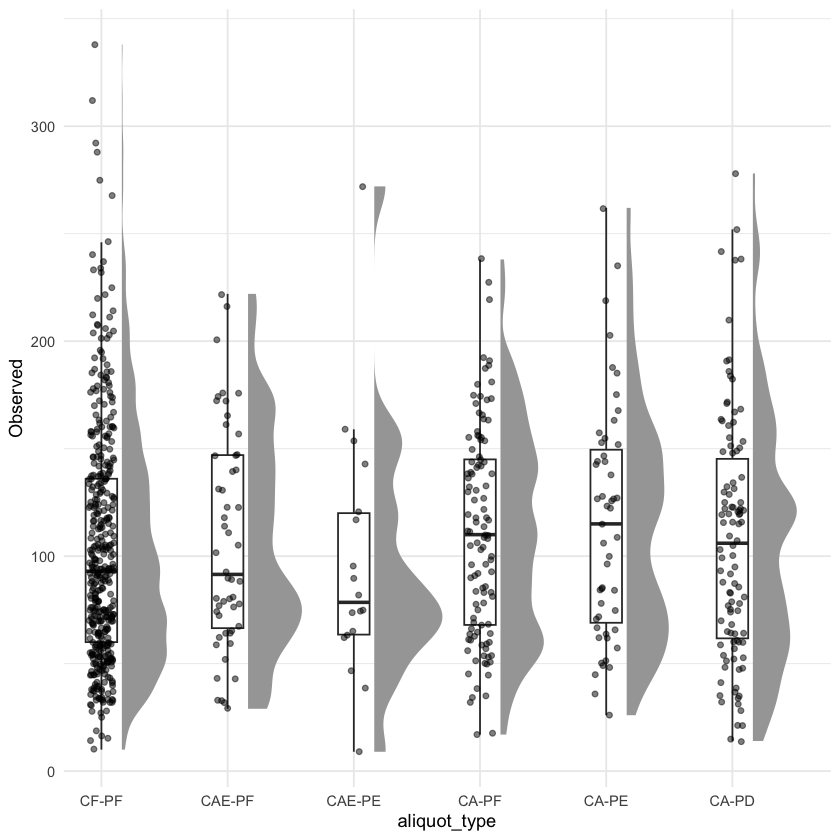

In [43]:
# rain cloud plots of alpha diversity (observed ASVs) by tooth health and HIV status
# install.packages("ggdist")
library(ggdist)
temp <- estimate_richness(subset_samples(ps.dat, study_group == "HI"))
temp$study_group <- "HI"
temp2 <- estimate_richness(subset_samples(ps.dat, study_group == "HEU"))
temp2$study_group <- "HEU"
temp3 <- estimate_richness(subset_samples(ps.dat, study_group == "HUU"))
temp3$study_group <- "HUU"

adiv_rain_study_group <- rbind(temp, temp2, temp3)
adiv_rain_study_group$study_group <- factor(adiv_rain_study_group$study_group, levels=c("HI", "HEU", "HUU"))

# raincloud plot HI group
p <- ggplot(adiv_rain_study_group, aes(x = study_group, y = Observed)) + 
  ggdist::stat_halfeye(
    adjust = .5, 
    width = .6, 
    .width = 0, 
    justification = -.3, 
    point_colour = NA) + 
  geom_boxplot(
    width = .25, 
    outlier.shape = NA
  ) +
  geom_point(
    size = 1.3,
    alpha = .5,
    position = position_jitter(
      seed = 1, width = .1
    )
  ) + 
    theme_minimal() +
  coord_cartesian(xlim = c(1.3, NA))
p
pdf("adiv_rain_study_group.pdf")
p
dev.off()

# raincloud plots aliquot type
temp <- estimate_richness(subset_samples(ps.dat, aliquot_type == "CF-PF"))
temp$aliquot_type <- "CF-PF"
temp2 <- estimate_richness(subset_samples(ps.dat, aliquot_type == "CAE-PF"))
temp2$aliquot_type <- "CAE-PF"
temp3 <- estimate_richness(subset_samples(ps.dat, aliquot_type == "CAE-PE"))
temp3$aliquot_type <- "CAE-PE"
temp4 <- estimate_richness(subset_samples(ps.dat, aliquot_type == "CA-PF"))
temp4$aliquot_type <- "CA-PF"
temp5 <- estimate_richness(subset_samples(ps.dat, aliquot_type == "CA-PE"))
temp5$aliquot_type <- "CA-PE"
temp6 <- estimate_richness(subset_samples(ps.dat, aliquot_type == "CA-PD"))
temp6$aliquot_type <- "CA-PD"

adiv_rain_aliquot_type <- rbind(temp, temp2, temp3, temp4, temp5, temp6)
adiv_rain_aliquot_type$aliquot_type <- factor(adiv_rain_aliquot_type$aliquot_type, levels=c("CF-PF", "CAE-PF", "CAE-PE", "CA-PF", "CA-PE", "CA-PD"))

# raincloud plot HI group
p <- ggplot(adiv_rain_aliquot_type, aes(x = aliquot_type, y = Observed)) + 
  ggdist::stat_halfeye(
    adjust = .5, 
    width = .6, 
    .width = 0, 
    justification = -.3, 
    point_colour = NA) + 
  geom_boxplot(
    width = .25, 
    outlier.shape = NA
  ) +
  geom_point(
    size = 1.3,
    alpha = .5,
    position = position_jitter(
      seed = 1, width = .1
    )
  ) + 
    theme_minimal() +
  coord_cartesian(xlim = c(1.3, NA))
p
pdf("adiv_rain_aliquot_type.pdf")
p
dev.off()

In [41]:
# head(adiv_rain_aliquot_type)
pairwise.wilcox.test(adiv_rain_aliquot_type$Observed, adiv_rain_aliquot_type$aliquot_type, p.adjust.method = "fdr")
pairwise.wilcox.test(adiv_rain_study_group$Observed, adiv_rain_study_group$study_group, p.adjust.method = "fdr")


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  adiv_rain_aliquot_type$Observed and adiv_rain_aliquot_type$aliquot_type 

       CF-PF CAE-PF CAE-PE CA-PF CA-PE
CAE-PF 0.68  -      -      -     -    
CAE-PE 0.68  0.68   -      -     -    
CA-PF  0.67  0.68   0.67   -     -    
CA-PE  0.67  0.68   0.67   0.87  -    
CA-PD  0.68  0.94   0.68   0.68  0.68 

P value adjustment method: fdr 


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  adiv_rain_study_group$Observed and adiv_rain_study_group$study_group 

    HI   HEU 
HEU 0.73 -   
HUU 0.73 0.73

P value adjustment method: fdr 

In [42]:
# head(adiv_rain_aliquot_type)
pairwise.wilcox.test(adiv_rain_aliquot_type$Shannon, adiv_rain_aliquot_type$aliquot_type, p.adjust.method = "fdr")
pairwise.wilcox.test(adiv_rain_study_group$Shannon, adiv_rain_study_group$study_group, p.adjust.method = "fdr")


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  adiv_rain_aliquot_type$Shannon and adiv_rain_aliquot_type$aliquot_type 

       CF-PF CAE-PF CAE-PE CA-PF CA-PE
CAE-PF 0.98  -      -      -     -    
CAE-PE 0.98  0.98   -      -     -    
CA-PF  0.45  0.75   0.81   -     -    
CA-PE  0.45  0.52   0.75   0.84  -    
CA-PD  0.52  0.75   0.79   0.45  0.45 

P value adjustment method: fdr 


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  adiv_rain_study_group$Shannon and adiv_rain_study_group$study_group 

    HI   HEU 
HEU 0.81 -   
HUU 0.81 0.81

P value adjustment method: fdr 